## Euler Rotations

In this notebook you'll explore Euler rotations and get a feel for why the order of rotations matters.

Euler rotations as we define them in this program are counterclockwise about the axes of the vehicle body frame, where:

- *Roll* - $\phi$ is about the x-axis
- *Pitch* - $\theta$ is about the y-axis
- *Yaw* - $\psi$ is about the z-axis

As you'll see the same set of rotation transformations, applied in a different order can produce a very different final result!

In [1]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from enum import Enum

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [2]:
plt.rcParams["figure.figsize"] = [12, 12]

In [3]:
class Rotation(Enum):
    ROLL = 0
    PITCH = 1
    YAW = 2  


class EulerRotation:
    
    def __init__(self, rotations):
        """
        `rotations` is a list of 2-element tuples where the
        first element is the rotation kind and the second element
        is angle in degrees.
        
        Ex:
        
            [(Rotation.ROLL, 45), (Rotation.YAW, 32), (Rotation.PITCH, 55)]
            
        """
        self._rotations = rotations
        self._rotation_map = {Rotation.ROLL : self.roll, Rotation.PITCH : self.pitch, Rotation.YAW : self.yaw}

    def roll(self, phi):
        """Returns a rotation matrix along the roll axis"""
        return np.array([[1.0, 0.0, 0.0],
                         [0.0, np.cos(phi), -np.sin(phi)],
                         [0.0, np.sin(phi), np.cos(phi)]])
    
    def pitch(self, theta):
        """Returns the rotation matrix along the pitch axis"""
        return np.array([[np.cos(theta), 0.0, np.sin(theta)],
                         [0.0, 1.0, 0.0],
                         [-np.sin(theta), 0.0, np.cos(theta)]])

    def yaw(self, psi):
        """Returns the rotation matrix along the yaw axis"""
        return np.array([[np.cos(psi), -np.sin(psi), 0.0],
                         [np.sin(psi), np.cos(psi), 0.0],
                         [0.0, 0.0, 1.0]])

    def rotate(self):
        """Applies the rotations in sequential order"""
        t = np.eye(3)
        for r in self._rotations:
            kind = r[0]
            # convert from degrees to radians
            angle = np.deg2rad(r[1])
            t = np.dot(self._rotation_map[kind](angle), t)
        return t

Below you'll form a sequence of rotations. The rotation matrix `R` is the mapping of performing the rotations in sequential order. Multiplying a vector by `R` will perform the rotations on that vector.

In [4]:
# Test your code by passing in some rotation values
rotations = [
    (Rotation.ROLL, 25),
    (Rotation.PITCH, 75),
    (Rotation.YAW, 90),
]

R = EulerRotation(rotations).rotate()
print('Rotation matrix ...')
print(R)
# Should print
# Rotation matrix ...
# [[ 0.    -0.906  0.423]
#  [ 0.259  0.408  0.875]
#  [-0.966  0.109  0.235]]

Rotation matrix ...
[[ 0.    -0.906  0.423]
 [ 0.259  0.408  0.875]
 [-0.966  0.109  0.235]]


Go back and change the order of the rotations, you should get back a rotation matrix with different values.

### Same Rotations, Different Order

Now calculate three different rotations matrices. They should stem from the same set of Euler rotations, just in differing order.

In [5]:
# TODO: calculate 3 rotation matrices.
rot1 = [rotations[0], rotations[2], rotations[1]]
rot2 = [rotations[1], rotations[2], rotations[0]]
rot3 = [rotations[2], rotations[1], rotations[0]]
R1 = EulerRotation(rot1).rotate()
R2 = EulerRotation(rot2).rotate()
R3 = EulerRotation(rot3).rotate()

print(R1)
print(R2)
print(R3)

[[ 0.     0.174  0.985]
 [ 1.     0.    -0.   ]
 [-0.     0.985 -0.174]]
[[ 0.    -1.     0.   ]
 [ 0.643  0.     0.766]
 [-0.766  0.     0.643]]
[[ 0.    -0.259  0.966]
 [ 0.906 -0.408 -0.109]
 [ 0.423  0.875  0.235]]


### Seeing is Believing

It's clear the three rotation matrices are different, but, in order to get an deeper understanding let's plot the impact of the rotations.

In [6]:
# unit vector along x-axis
v = np.array([1, 0, 0])

Apply the rotations to `v`. Feel free to change the values of this input vector.

In [7]:
# TODO: calculate the new rotated versions of `v`.
rv1 = np.dot(R1, v)
rv2 = np.dot(R2, v)
rv3 = np.dot(R3, v)
# rv = np.dot(R, v)

Plotting time ...

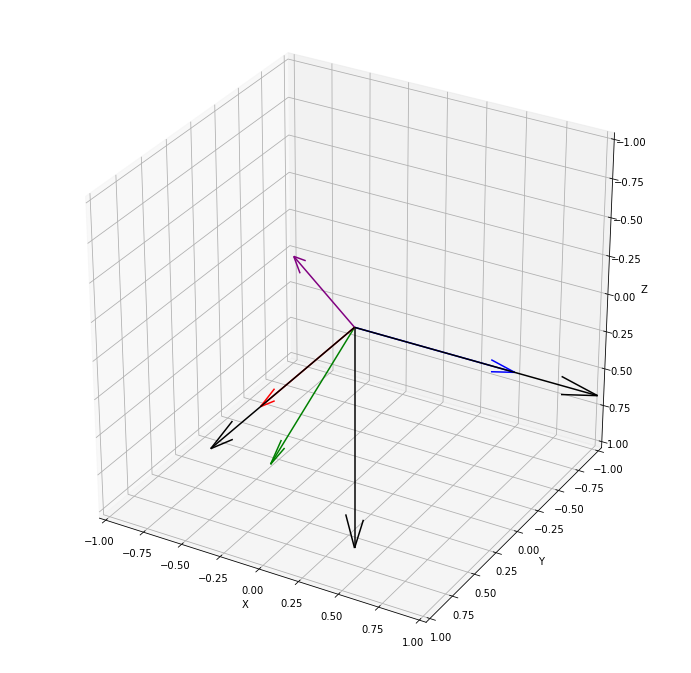

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# axes (shown in black)
ax.quiver(0, 0, 0, 1.5, 0, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 1.5, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 0, 1.5, color='black', arrow_length_ratio=0.15)


# Original Vector (shown in blue)
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', arrow_length_ratio=0.15)

# Rotated Vectors (shown in red)
ax.quiver(0, 0, 0, rv1[0], rv1[1], rv1[2], color='red', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv2[0], rv2[1], rv2[2], color='purple', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv3[0], rv3[1], rv3[2], color='green', arrow_length_ratio=0.15)

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(1, -1)
ax.set_zlim3d(1, -1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Gimbal Lock
To demonstrate gimbal lock try starting a series of rotations with a pitch of +/- 90 degrees, then see what happens when you try to yaw. Try the yaw first and see what happens!

[solution](/notebooks/Rotations-Solution.ipynb)